In [1]:
# importing Libraries
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

In [2]:
# Importing the dataset
data = pd.read_csv('ev_data_US.csv')
data.head()

,County,City,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range
0,King,Seattle,98112,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270
1,Yakima,Zillah,98953,2024,BMW,330E,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,20
2,King,Kent,98031,2015,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,84
3,Snohomish,Bothell,98012,2015,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208
4,Yakima,Yakima,98908,2022,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42


In [3]:
# Electric Vehicle registered over the years
ev_reg_counts=data['Model Year'].value_counts().sort_index()
ev_reg_counts

Model Year
1997        1
1998        1
1999        5
2000        7
2002        2
2003        1
2008       21
2010       24
2011      736
2012     1592
2013     4356
2014     3521
2015     4802
2016     5517
2017     8625
2018    14303
2019    10902
2020    12112
2021    19462
2022    28045
2023    60004
2024    16944
Name: count, dtype: int64

In [4]:
# Model to predict the number of EVs registered in the US for the next five years

# Filtering the data to include data till 2023
filtered_years = ev_reg_counts[ev_reg_counts.index <= 2023]

# defining function for exponential growth to fit the data
def exp_growth(x, a, b):
    return a * np.exp(b * x)

# preparing the data for curve fitting
x_data = filtered_years.index - filtered_years.index.min()
y_data = filtered_years.values

# fitting the data to the exponential growth function
params, covariance = curve_fit(exp_growth, x_data, y_data)

# forecasting the number of EVs for 2024 and the next five years
forecast_years = np.arange(2024, 2024 + 6) - filtered_years.index.min()
forecasted_values = exp_growth(forecast_years, *params)

# creating a dictionary to display the forecasted values for easier interpretation
forecasted_dict = dict(zip(forecast_years + filtered_years.index.min(), forecasted_values))

In [5]:
# preparing data for plotting

# actual and forecasted years
years = np.arange(filtered_years.index.min(), 2029 + 1)
actual_years = filtered_years.index
forecast_years_full = np.arange(2024, 2029 + 1)

# actual and forecasted values
actual_values = filtered_years.values
forecasted_values_full = [forecasted_dict[year] for year in forecast_years_full]

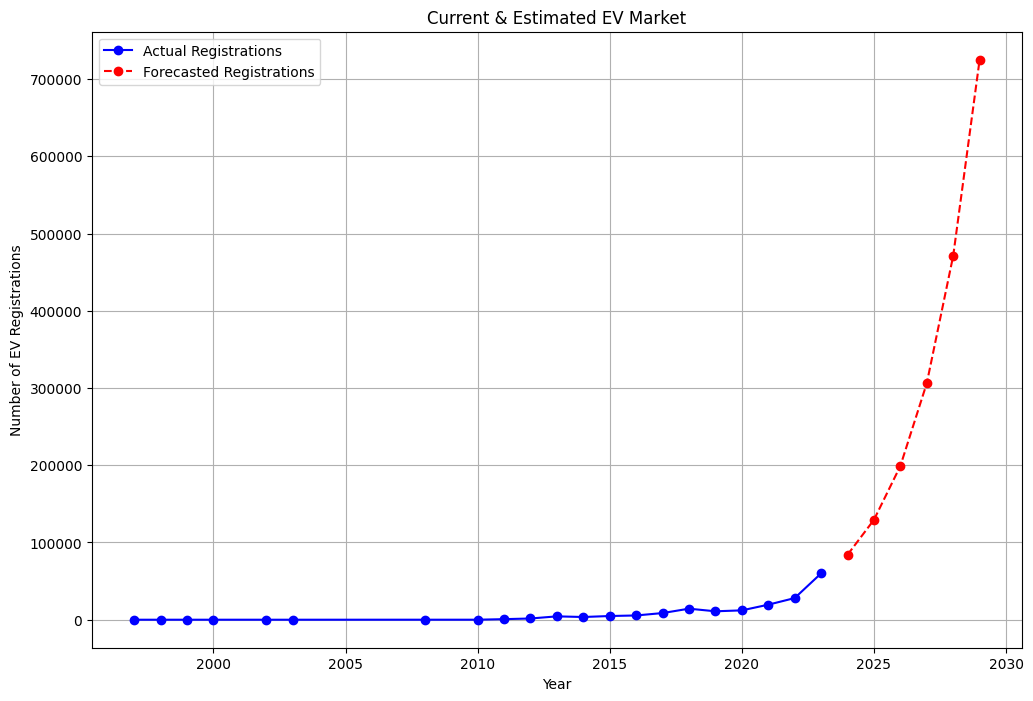

In [6]:
# ploting the actual and forecasted values
plt.figure(figsize=(12, 8))
plt.plot(actual_years, actual_values, 'bo-', label='Actual Registrations')
plt.plot(forecast_years_full, forecasted_values_full, 'ro--', label='Forecasted Registrations')
plt.title('Current & Estimated EV Market')
plt.xlabel('Year')
plt.ylabel('Number of EV Registrations')
plt.legend()
plt.grid(True)
plt.show()

In [7]:
# Saving the forecasted values to a csv file
forecasted_evs_df = pd.DataFrame(forecasted_dict.items(), columns=['Year', 'Forecasted EVs'])
forecasted_evs_df.to_csv('EV_forecasted_data.csv', index=False)
print("Forecasted data saved to EV_forecasted_data.csv")

Forecasted data saved to EV_forecasted_data.csv
